<a href="https://colab.research.google.com/github/Gauravsaha-97/HousePrice/blob/master/HousePrice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#importing packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files
dataset = files.upload()

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Saving data.csv to data.csv


In [18]:
dataset = pd.read_csv('data.csv',parse_dates=True, index_col='statezip')
dataset.head(8)
cols_to_drop = ['country','city','street','yr_renovated','yr_built']  #columns to drop
dataset.drop(cols_to_drop,inplace = True, axis=1)
dataset.head(8)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement
statezip,,,,,,,,,,,,
WA 98133,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0
WA 98119,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280
WA 98042,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0
WA 98008,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000
WA 98052,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800
WA 98115,2014-05-02 00:00:00,490000.0,2.0,1.00,880,6380,1.0,0,0,3,880,0
WA 98052,2014-05-02 00:00:00,335000.0,2.0,2.00,1350,2560,1.0,0,0,3,1350,0
WA 98038,2014-05-02 00:00:00,482000.0,4.0,2.50,2710,35868,2.0,0,0,3,2710,0


In [0]:
dataset.shape

(4600, 11)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
 <a list of 11 Text major ticklabel objects>)

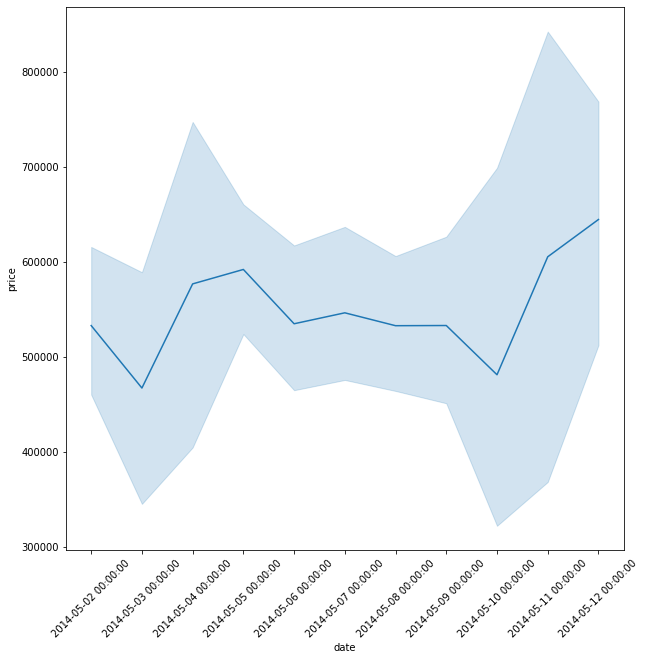

In [25]:
features = ['bedrooms','bathrooms','sqft_living','floors','condition','date']
target = 'price'
house_data = dataset.iloc[:500,:]
plt.figure(figsize=(10,10))
sns.lineplot(x='date',y='price',data=house_data)
plt.xticks(rotation = 45)       #Plot of Price of houses vs Date

([0, 1, 2, 3, 4, 5, 6, 7, 8], <a list of 9 Text major ticklabel objects>)

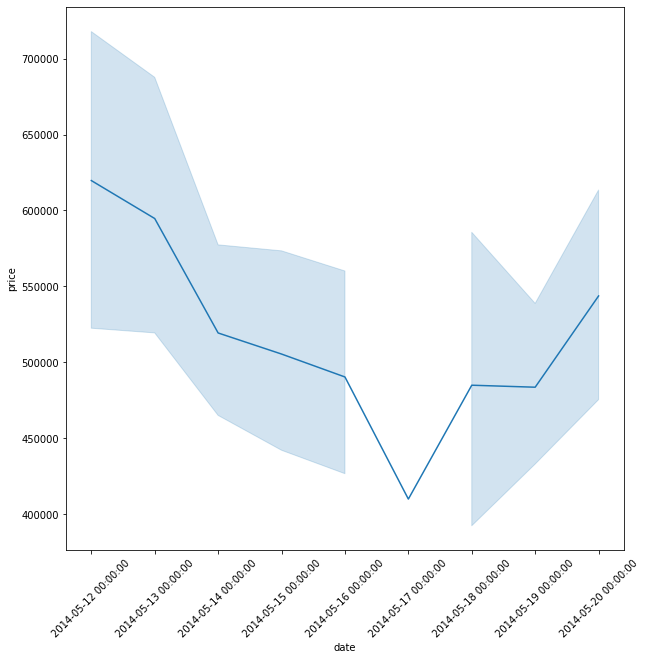

In [26]:
house_data = dataset.iloc[500:1000,:]
plt.figure(figsize=(10,10))
sns.lineplot(x='date',y='price',data=house_data)
plt.xticks(rotation = 45)

([0, 1, 2, 3, 4, 5, 6, 7, 8], <a list of 9 Text major ticklabel objects>)

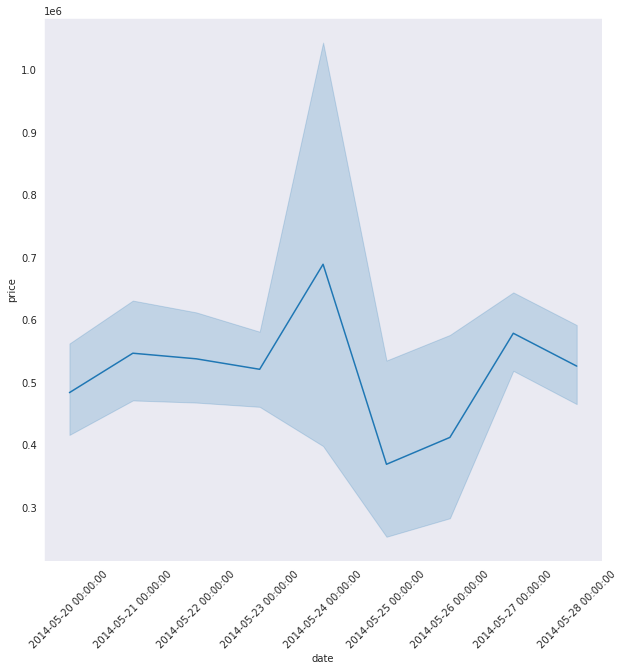

In [71]:
house_data = dataset.iloc[1000:1500,:]
plt.figure(figsize=(10,10))

sns.lineplot(x='date',y='price',data=house_data)
plt.xticks(rotation = 45)

<Figure size 1296x1296 with 0 Axes>

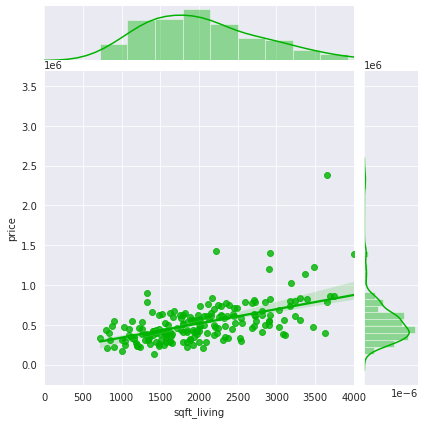

In [43]:
house_data = dataset.iloc[:200,:]
plt.figure(figsize=(18,18))
sns.set_style(style='darkgrid')
sns.jointplot(x='sqft_living',y='price',kind = 'regg',data=house_data,xlim=(0,4000),color='#00b300')      #Plot of Square foot of living vs Price

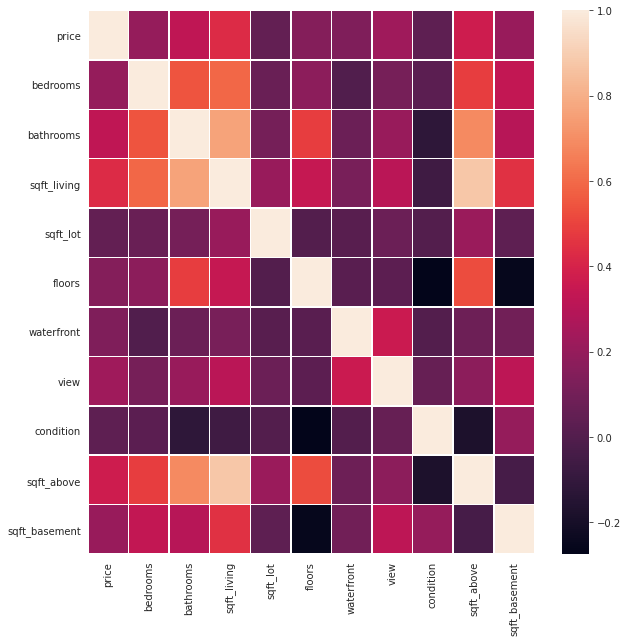

In [54]:
plt.figure(figsize=(10,10))
sns.heatmap(dataset.corr(),annot=False, fmt='.1f',linewidths=0.5)   #Heatmap of correlation matrix

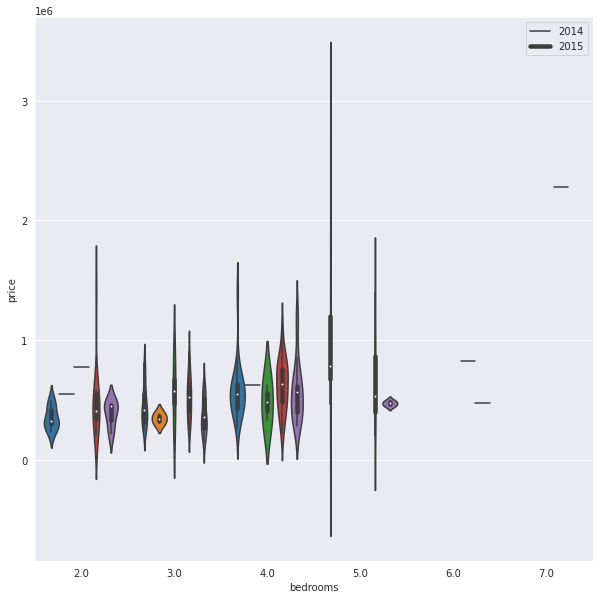

In [64]:
house_data = dataset.iloc[:200,:]
year = ['2014','2015']
plt.figure(figsize=(10,10))
sns.violinplot(x='bedrooms',y='price',hue='date',data = house_data)
plt.legend(year)

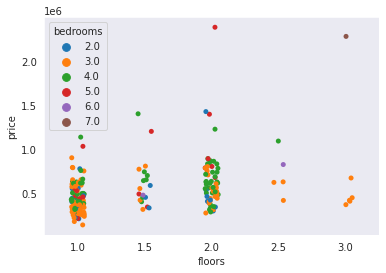

In [73]:
house_data = dataset.iloc[:200,]
sns.stripplot(x='floors',y='price',hue='bedrooms',data=house_data,jitter = True)


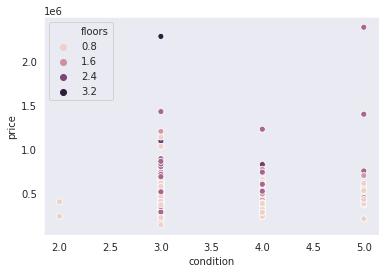

In [78]:
sns.scatterplot(x='condition',y='price',hue='floors',data=house_data)

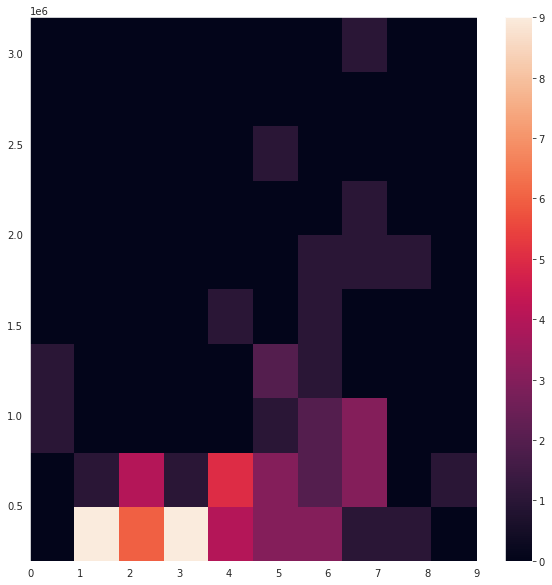

In [93]:
bed_data = dataset.groupby('bedrooms')[['price','bedrooms']].head(10)
plt.figure(figsize = (10,10))
plt.hist2d(x='bedrooms',y='price',data = bed_data)
plt.colorbar()
plt.show()

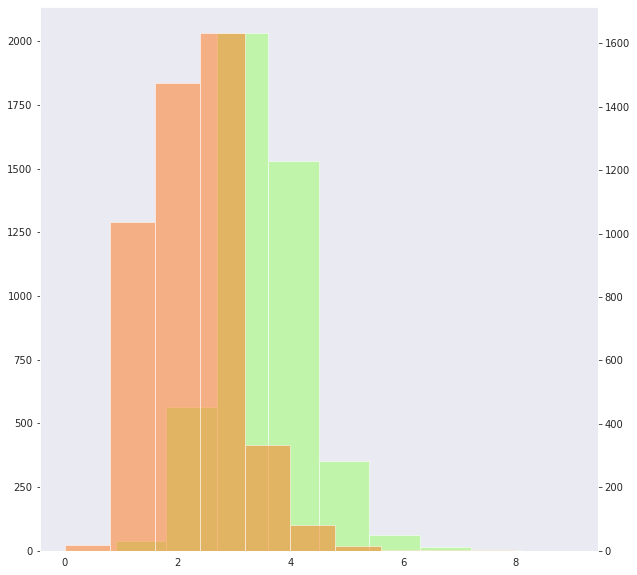

In [103]:
plt.figure(figsize = (10,10))
plt.hist('bedrooms',data=dataset,alpha = 0.5,color = '#99ff66')
plt.twinx()
plt.hist('bathrooms',data=dataset,alpha = 0.5,color='#ff751a')
plt.show()
